In [36]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Elevation

In [37]:
import geopandas as gpd
from rasterstats import zonal_stats

zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/turkey/clean_shp.shp"
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/elevation/ELE.tif"

gdf = gpd.read_file(zones)

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


In [38]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m) in Turkey districts')

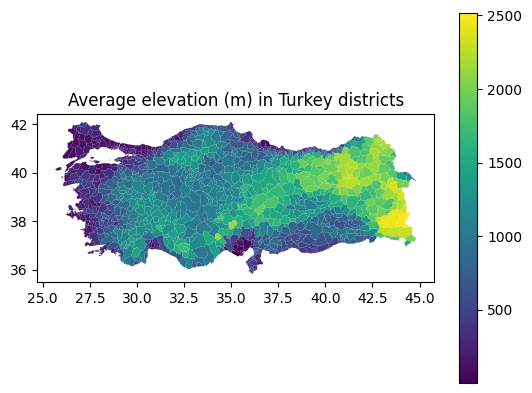

In [39]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m) in Turkey districts")

In [40]:
gdf['location'] = gdf['adm2_tr'] + ', ' + gdf['adm1_tr']

## Coastal

In [41]:
coast = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/turkey_coastline.shp')

In [42]:
coast['location'] = coast['adm2_tr'] + ', ' + coast['adm1_tr']

In [43]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<AxesSubplot:>

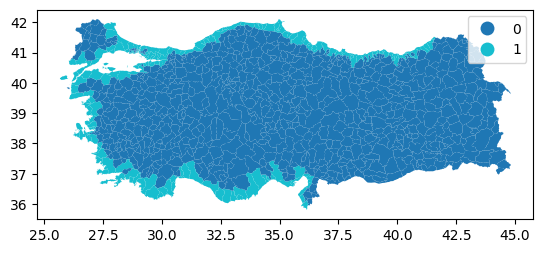

In [44]:
gdf.plot(column='coast', categorical= True, legend=True)

## Human Development Index

In [45]:
import pandas as pd

In [46]:
hdi = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/turkey/GDL-Subnational-HDI-data.csv')

In [47]:
hdi['Region'] = [x.split('(')[0].strip() for x in hdi['Region']]

In [48]:
hdi['Region'] = hdi['Region'].map({'Aegean': 'Izmir, Aydin, Denizli, Mugla, Manisa, Afyonkarahisar, Kutahya, Usak', 
    'Central Anatolia': 'Kirikkale, Aksaray, Nigde, Nevsehir, Kirsehir, Kayseri, Sivas, Yozgat', 
    'Central East Anatolia':'Malatya, Elazig, Bingol, Tunceli, Van, Mus, Bitlis, Hakkari',
    'East Black Sea': 'Trabzon, Ordu, Giresun, Rize, Artvin, Gumushane',
    'East Marmara':'Bursa, Eskisehir, Bilecik, Kocaeli, Sakarya, Duzce, Bolu, Yalova',
                   'Istanbul':'Istanbul',
    'Mediterranean':'Antalya, Isparta, Burdur, Adana, Mersin, Hatay, Kahramanmaras, Osmaniye',
    'North East Anatolia':'Erzurum, Erzincan, Bayburt, Agri, Kars, Igdir, Ardahan',
    'South East Anatolia':'Gaziantep, Adiyaman, Kilis, Sanliurfa, Diyarbakir, Mardin, Batman, Sirnak, Siirt',
    'West Anatolia':'Ankara, Konya, Karaman',
    'West Black Sea': 'Zonguldak, Karabuk, Bartin, Kastamonu, Cankiri, Sinop, Samsun, Tokat, Corum, Amasya',
    'West Marmara': 'Tekirdag, Edirne, Kirklareli, Balikesir, Canakkale'})
    

In [49]:
hdi['Region'] = [x.split(', ') for x in hdi['Region']]

In [50]:
hdi = hdi.explode('Region').reset_index(drop=True)

In [51]:
gdf['adm1'] = [x.title() for x in gdf['adm1_en']]

In [52]:
hdi.rename(columns={'2021':'HDI'}, inplace=True)

In [53]:
gdf = gdf.merge(hdi[['Region', 'HDI']], left_on='adm1', right_on='Region')

Text(0.5, 1.0, 'Provincial HDI Turkey')

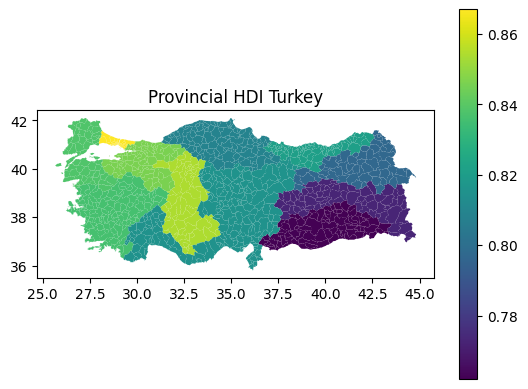

In [54]:
gdf.plot(column='HDI', legend=True)
plt.title('Provincial HDI Turkey')

## Population density

In [55]:
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/turkey/popdens/tur_pd_2020_1km_UNadj.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["min", "max", "mean"]))
gdf = gdf.join(stats)


In [56]:
gdf.rename(columns={'mean':'popdens'}, inplace=True)

In [ ]:
gdf.plot(column='popdens', legend=True)

In [58]:
#gdf.rename(columns={'adm2_tr':'adm2', 'adm1_tr':'adm1'}, inplace=True)

In [59]:

gdf['adm2'] = [x.title() for x in gdf['adm2_tr']]
gdf['adm1'] = [x.title() for x in gdf['adm1_tr']]

In [60]:
gdf['adm2'] = [x.replace('Amasya', 'Amasya District') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Marmara Ereğli̇si̇', 'Marmaraereğlisi') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Hakkari', 'Hakkâri') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Oni̇ki̇ Şubat', 'Onikişubat') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Sarkişla', 'Şarkişla') for x in gdf['adm2']]




In [61]:
import unidecode


gdf['adm2'] = gdf['adm2'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
gdf['adm1'] = gdf['adm1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']





In [62]:
full_df = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/daily_max/Turkey/daily_max_turkey.csv')

In [63]:
[x for x in full_df['location'].unique() if x not in gdf['location'].unique()]

[]

In [64]:
gdf = gdf[['adm1', 'adm2', 'location', 'geometry', 'HDI', 'mean_elev', 'coast', 'popdens']]

## Age

In [66]:
import glob

In [67]:
gdf['over60_pop'] = 0
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/turkey/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']




/Users/shivyucel/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [68]:
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/turkey/pop/*'):
    
    values = file
    
    over_60 = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = over_60['sum']

In [69]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

In [ ]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

In [71]:
HDI_subset = gdf.drop_duplicates('HDI')

In [72]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)

In [73]:
HDI_subset['HDI_dec'] = deciles

/Users/shivyucel/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [74]:
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')

In [77]:
gdf['popden_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

In [79]:
gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_65858/1511703856.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged.shp')
